# __Prediksi Jamur Beracun__

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc

### Preprocessing

In [24]:
data = pd.read_csv('mushrooms.csv', sep=',')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [25]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [28]:
for i in data.columns:
    label = LabelEncoder()
    label.fit(data[i])
    data[i+'"'] = label.transform(data[i])

### Spliting Data

In [44]:
xtr, xts, ytr, yts = train_test_split(
    data[[
        'cap-shape"', 'cap-surface"',
       'cap-color"', 'bruises"', 'odor"',
       'gill-attachment"', 'gill-spacing"', 'gill-size"',
       'gill-color"', 'stalk-shape"', 'stalk-root"',
       'stalk-surface-above-ring"', 'stalk-surface-below-ring"',
       'stalk-color-above-ring"', 'stalk-color-below-ring"',
       'veil-type"', 'veil-color"', 'ring-number"',
       'ring-type"', 'spore-print-color"', 'population"',
       'habitat"'
    ]],
    data['class"'], test_size = 0.2)

print(xtr.shape, xts.shape)

(6499, 22) (1625, 22)


### Hyperparameter Tunning

In [45]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param = {
    'penalty': penalty, 'solver': solver, 'max_iter': max_iter
}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [46]:
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression()
modelrs = GridSearchCV(
    estimator = model,
    param_grid = param,
    cv = 5
)
modelrs.fit(xtr, ytr)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [48]:
model_tuning = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                  fit_intercept=True,
                                  intercept_scaling=1, l1_ratio=None,
                                  max_iter=100, multi_class='auto',
                                  n_jobs=None, penalty='l2',
                                  random_state=None, solver='lbfgs',
                                  tol=0.0001, verbose=0,
                                  warm_start=False
                                 )
                                  
model_tuning.fit(xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation Metrics

In [59]:
print('Precision: ' ,precision_score(yts, model_tuning.predict(xts)))
print('Balanced Accuracy: ' ,balanced_accuracy_score(yts, model_tuning.predict(xts)))
print('Recall: ' ,recall_score(yts, model_tuning.predict(xts)))
print('ROCAUC: ' ,roc_auc_score(yts, model_tuning.predict(xts)))
print('F1 score: ' ,f1_score(yts, model_tuning.predict(xts)))

Precision:  0.9546666666666667
Balanced Accuracy:  0.9469400655841334
Recall:  0.9335071707953064
ROCAUC:  0.9469400655841334
F1 score:  0.9439683586025049


### ROC AUC

In [66]:
df = pd.DataFrame()
df['class'] = data['class"'].copy()
column = data[[
        'cap-shape"', 'cap-surface"',
       'cap-color"', 'bruises"', 'odor"',
       'gill-attachment"', 'gill-spacing"', 'gill-size"',
       'gill-color"', 'stalk-shape"', 'stalk-root"',
       'stalk-surface-above-ring"', 'stalk-surface-below-ring"',
       'stalk-color-above-ring"', 'stalk-color-below-ring"',
       'veil-type"', 'veil-color"', 'ring-number"',
       'ring-type"', 'spore-print-color"', 'population"',
       'habitat"'
    ]]
df['proba'] = model_tuning.predict_proba(column)[:,1]
df.head()

,class,proba
0,1,0.828453
1,0,0.191133
2,0,0.065836
3,1,0.843274
4,0,0.000001


In [67]:
df['y pred 0.1'] = df['proba'].apply(lambda x: 1 if (x > 0.1) else 0)
df['y pred 0.2'] = df['proba'].apply(lambda x: 1 if (x > 0.2) else 0)
df['y pred 0.3'] = df['proba'].apply(lambda x: 1 if (x > 0.3) else 0)
df['y pred 0.4'] = df['proba'].apply(lambda x: 1 if (x > 0.4) else 0)
df['y pred 0.5'] = df['proba'].apply(lambda x: 1 if (x > 0.5) else 0)
df['y pred 0.6'] = df['proba'].apply(lambda x: 1 if (x > 0.6) else 0)
df['y pred 0.7'] = df['proba'].apply(lambda x: 1 if (x > 0.7) else 0)
df['y pred 0.8'] = df['proba'].apply(lambda x: 1 if (x > 0.8) else 0)
df['y pred 0.9'] = df['proba'].apply(lambda x: 1 if (x > 0.9) else 0)
df

,class,proba,y pred 0.1,y pred 0.2,y pred 0.3,y pred 0.4,y pred 0.5,y pred 0.6,y pred 0.7,y pred 0.8,y pred 0.9
0,1,0.828453,1,1,1,1,1,1,1,1,0
1,0,0.191133,1,0,0,0,0,0,0,0,0
2,0,0.065836,0,0,0,0,0,0,0,0,0
3,1,0.843274,1,1,1,1,1,1,1,1,0
4,0,0.000001,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0.038573,0,0,0,0,0,0,0,0,0
8120,0,0.000051,0,0,0,0,0,0,0,0,0
8121,0,0.082754,0,0,0,0,0,0,0,0,0
8122,1,0.930746,1,1,1,1,1,1,1,1,1


### Plot Roc Auc

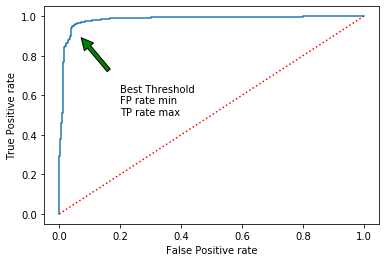

In [70]:
fpr, tpr, thres = roc_curve(yts, model_tuning.predict_proba(xts)[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.annotate('Best Threshold \nFP rate min \nTP rate max', xy=(0.04,0.95), xytext=(.2, .5),
            arrowprops=dict(facecolor='green', shrink=.2))
plt.show()